## Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
data = pd.read_csv('../data/data_hasil_translate_30k.csv')

print(data.head())


                                           statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  
0                                           Ya ampun  
1  susah tidur, pikiran kacau, hati gelisah. Semu...  
2  Semua salah, mundurlah sayang, maju terus ragu...  
3  Aku mengalihkan fokusku ke hal lain tapi aku m...  
4  Aku gelisah dan gelisah, sudah sebulan sekaran...  


In [ ]:
X = data[['translated_statement']]
y = data['status']  # Target variabel 'status'

## Split Training and Testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Identify numeric and non-numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns

print("Numeric columns:", numeric_columns)
print("Non-numeric columns:", non_numeric_columns)


Numeric columns: Index([], dtype='object')
Non-numeric columns: Index(['translated_statement'], dtype='object')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TfidfVectorizer untuk kolom 'translated_statement'
vectorizer = TfidfVectorizer(max_features=5000)
X_train_statement = vectorizer.fit_transform(X_train['translated_statement']).toarray()
X_test_statement = vectorizer.transform(X_test['translated_statement']).toarray()

# Gabungkan hasil vektorisasi ke dalam DataFrame
X_train = pd.DataFrame(X_train_statement)
X_test = pd.DataFrame(X_test_statement)

print(X_train.head())

   0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target variabel 'status'
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Normalisasi data (Scalling)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create and Training Model

In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

## Predict Model

In [ ]:
y_pred = svm_model.predict(X_test)


## Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

Akurasi: 0.7146500425049589


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.43      0.56       364
           1       0.88      0.28      0.42       213
           2       0.56      0.64      0.60      1623
           3       0.80      0.95      0.87      3222
           4       1.00      0.15      0.26        66
           5       0.64      0.10      0.17       318
           6       0.66      0.53      0.59      1252

    accuracy                           0.71      7058
   macro avg       0.76      0.44      0.50      7058
weighted avg       0.72      0.71      0.69      7058



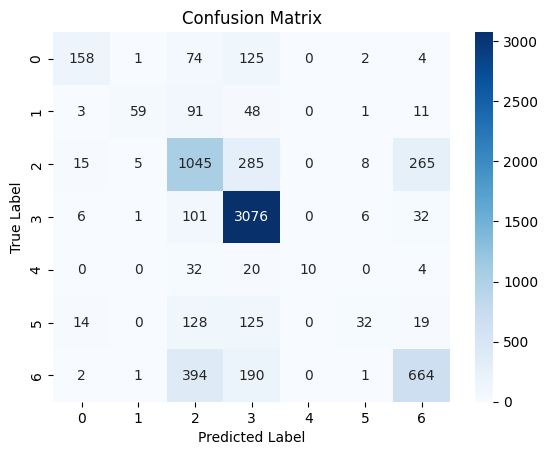

In [18]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


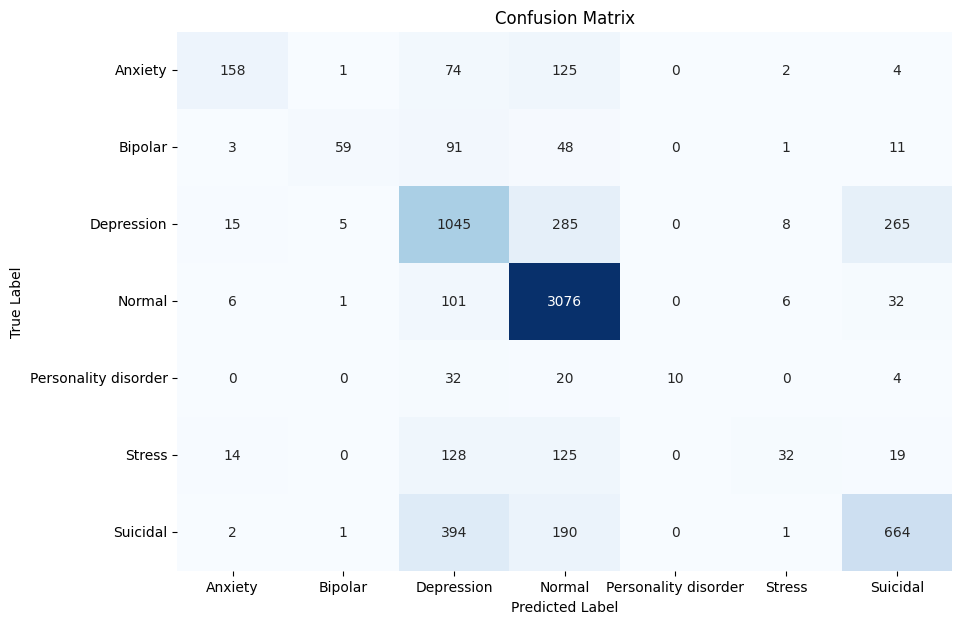

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [ ]:
# import joblib

# joblib.dump(svm_model, 'svm_model.pkl')
# model.save('../SVM/svm_model.h5')